In [1]:
# Dependencies
import requests as req
import json
import zipcodes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import http.client
import datetime
import time as time
import zip_functions as zf
import csv

In [2]:
#read zip code file and verify the zip is valid
all_zips = pd.read_csv("Resources/free-zipcode-database-Primary.csv")

In [3]:
# get latitude and longitude of target zipcode for use with google places
target_zip = input("Which zipcode would you like to score? ")
invalid_zip = True

#make sure the zip code is in the valid zip code file
while invalid_zip == True:
    if any(all_zips["Zipcode"] == int(target_zip)):

        invalid_zip = False

    else:
        print("That is not a valid zip code")
        target_zip = input("Please try a new, nearby zipcode ")


lat = zipcodes.matching(target_zip)[0]["lat"]
lng = zipcodes.matching(target_zip)[0]["long"]
city = zipcodes.matching(target_zip)[0]["city"]
state = zipcodes.matching(target_zip)[0]["state"]

Which zipcode would you like to score? 60201


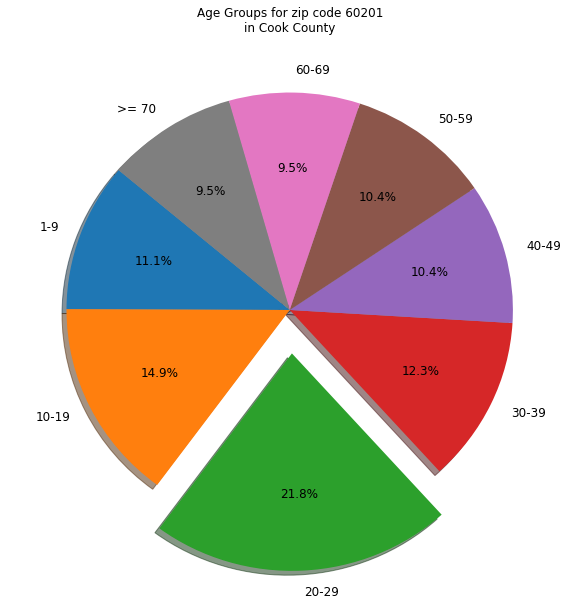

In [4]:
# get and plot the community data and age demographics
resp = zf.get_community_data(target_zip)
county = zf.age_demographics_zip(resp,target_zip)

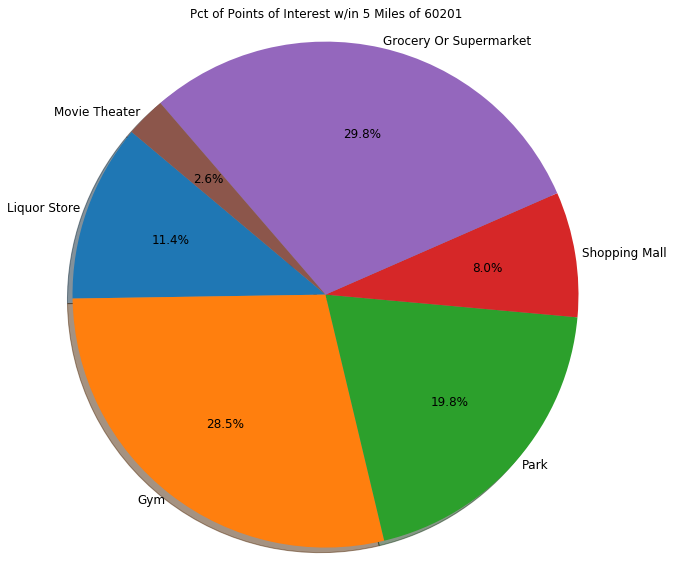

In [5]:
# run the pie_plot function to graph points of interest
# poi is the return dictionary of results from the barfinder function
poi = zf.barfinder(lat,lng)
poi_total = sum(poi.values())
zf.pie_plot(poi, target_zip)

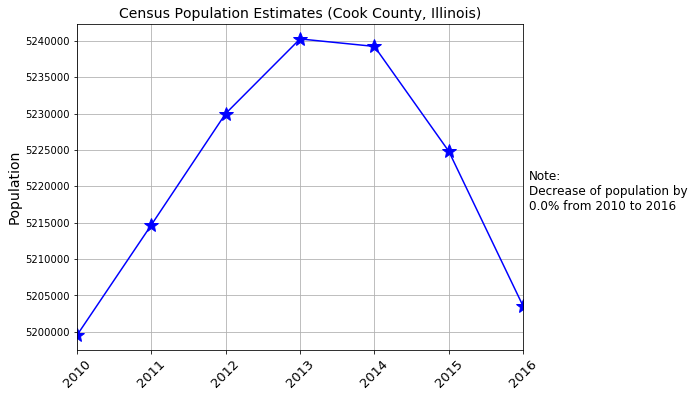

UnboundLocalError: local variable 'pop_growth' referenced before assignment

In [6]:
# Use the census data to determine population growth for zip codes
pop_est,county_name,state_name = zf.cen_block_query(lat,lng)
pop_growth = zf.census_plot(pop_est,county_name,state_name)

In [ ]:
#create the factors dictionary 
zip_factors_dict = {}


#get Real Estate data 
df, periods, zip_factors_dict['home_value'], zip_factors_dict['rent'] = zf.get_home_data(target_zip, city, state)

#plot the home values and rent
zf.plot_homes(df,target_zip,periods)

#get more data for the zip code and store in the dictionary
zip_factors_dict = zf.get_zip_factors(target_zip,lat, lng, zip_factors_dict)    

#get school data
#radius in miles -- what do we want to use here? 2 is fine for urban and suburban; may be too small for rural
radius = 5
#total schools, private, public, catholic
ts, pv, pub, ca = zf.get_school_data(lat, lng, radius)

# plot the school data
zf.plot_schools(pv, pub, ca, radius, target_zip)

#store results in factors dictionary
zip_factors_dict["private_schools"] = pv
zip_factors_dict["public_schools"] = pub
zip_factors_dict["cath_schools"] = ca


#get other factors from census and google
#### NEED TO CALL THOSE FUNCTIONS AND POPULATE the DICTIONARY WITH REAL VALUES
zip_factors_dict['pop_growth'] = pop_growth
zip_factors_dict['poi'] = poi_total
zip_factors_dict['city'] = city
zip_factors_dict['state'] = state
zip_factors_dict['county'] = county
zip_factors_dict['zip_code'] = target_zip

#compute the score from the values in the dictionary
score = zf.compute_score(zip_factors_dict)

In [ ]:
#print the score 
print("Score (range 0-100) for Zip Code %s: %s" % (target_zip, int(score*100)))